SEATTLE-LOS_ANGELES-SAN_FRANSISCO:
             id    host_id  host_name  neighbourhood_group  \
0          6606      14942      Joyce  Other neighborhoods   
1          9419      30559  Angielena  Other neighborhoods   
2          9531      31481     Cassie         West Seattle   
3          9534      31481     Cassie         West Seattle   
4          9596      14942      Joyce  Other neighborhoods   
...         ...        ...        ...                  ...   
60833  40191004  267895362      Rocky                  NaN   
60834  32766699   28996560       Otto                  NaN   
60835  25842694   57068872       Echo                  NaN   
60836     47682     216682        Jay                  NaN   
60837  29039496   70722023    Michael                  NaN   

               neighbourhood  latitude  longitude        room_type  price  \
0                Wallingford  47.65444 -122.33629  Entire home/apt   99.0   
1                 Georgetown  47.55017 -122.31937     Private room

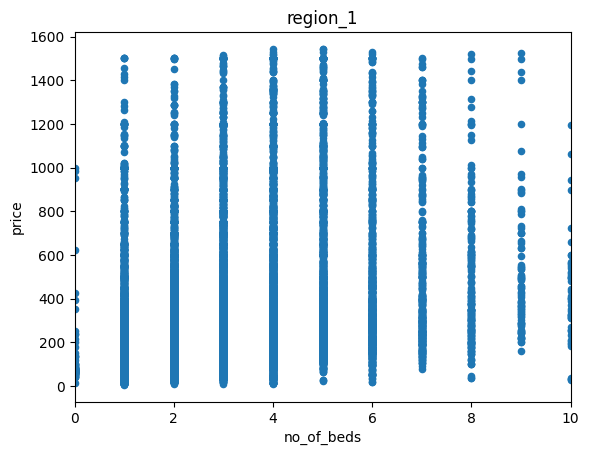

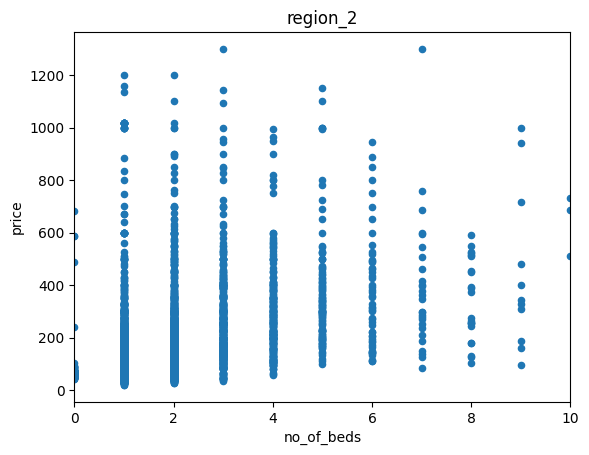

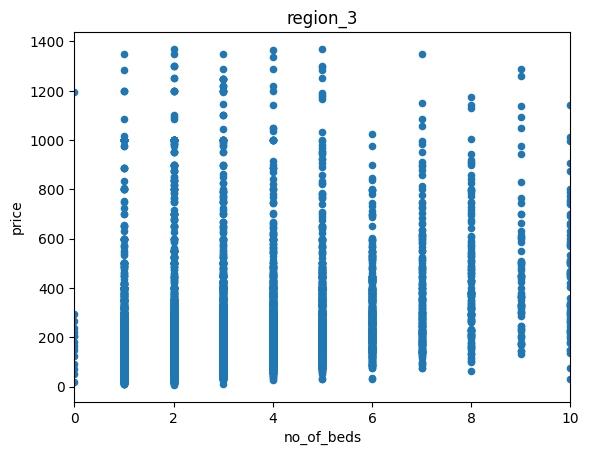

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as zscore_helper
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

##Processing and storing the data in data frames for further processing

region_1 = ["listings_seattle_WA.csv", "listings_losangeles_CA.csv",
            "listings_sanfransisco_CA.csv"]
region_1_data_frames=[]
for region in region_1:
  data_frame=pd.read_csv(region)
  parts = region.split('/')
  filename_part = parts[-1]
  filename_without_extension = filename_part.split('.')[0]
  city_state = filename_without_extension.split('_')[-2:]
  data_frame["city"] = city_state[0]
  data_frame["state"] = city_state[1]
  region_1_data_frames.append(data_frame)
region_1_data_frames = pd.concat(region_1_data_frames, ignore_index=True)
region_1_data_frames["is_regularly_available"] = (region_1_data_frames["availability_365"] > 10)
new_column_name = "no_of_beds"
new_column_name_1 = "rating"
split_data = region_1_data_frames["name"].str.split(" . ", expand=True)[3].rename(new_column_name)
split_data_1 = region_1_data_frames["name"].str.split(" . ", expand=True)[1].rename(new_column_name_1)
region_1_data_frames = pd.concat([region_1_data_frames.drop("name", axis=1), split_data, split_data_1], axis=1)
region_1_data_frames['no_of_beds'] = region_1_data_frames['no_of_beds'].str.extract('(\d+)')[0]
region_1_data_frames['no_of_beds'] = region_1_data_frames['no_of_beds'].astype('Int64')
region_1_data_frames['rating'] = region_1_data_frames['rating'].str.extract(r'★(\d+\.\d+)').astype(float)
print("SEATTLE-LOS_ANGELES-SAN_FRANSISCO:")
print(region_1_data_frames)

region_2 = ["listings_newyorkcity_NY.csv", "listings_boston_MA.csv",
            "listings_jerseycity_NJ.csv"]
region_2_data_frames=[]
for region in region_2:
  data_frame=pd.read_csv(region)
  parts = region.split('/')
  filename_part = parts[-1]
  filename_without_extension = filename_part.split('.')[0]
  city_state = filename_without_extension.split('_')[-2:]
  data_frame["city"] = city_state[0]
  data_frame["state"] = city_state[1]
  region_2_data_frames.append(data_frame)
region_2_data_frames = pd.concat(region_2_data_frames, ignore_index=True)
region_2_data_frames["is_regularly_available"] = (region_2_data_frames["availability_365"] > 10)
new_column_name = "no_of_beds"
new_column_name_1 = "rating"
split_data = region_2_data_frames["name"].str.split(" . ", expand=True)[3].rename(new_column_name)
split_data_1 = region_2_data_frames["name"].str.split(" . ", expand=True)[1].rename(new_column_name_1)
region_2_data_frames = pd.concat([region_2_data_frames.drop("name", axis=1), split_data, split_data_1], axis=1)
region_2_data_frames['no_of_beds'] = region_2_data_frames['no_of_beds'].str.extract('(\d+)')[0]
region_2_data_frames['no_of_beds'] = region_2_data_frames['no_of_beds'].astype('Int64')
region_2_data_frames['rating'] = region_2_data_frames['rating'].str.extract(r'★(\d+\.\d+)').astype(float)
print("NEWYORK_CITY-BOSTON-JERSEY_CITY:")
print(region_2_data_frames)

region_3 = ["listings_twincities_MS.csv", "listings_chicago_IL.csv",
            "listings_columbus_OH.csv"]
region_3_data_frames=[]
for region in region_3:
  data_frame=pd.read_csv(region)
  parts = region.split('/')
  filename_part = parts[-1]
  filename_without_extension = filename_part.split('.')[0]
  city_state = filename_without_extension.split('_')[-2:]
  data_frame["city"] = city_state[0]
  data_frame["state"] = city_state[1]
  region_3_data_frames.append(data_frame)
region_3_data_frames = pd.concat(region_3_data_frames, ignore_index=True)
region_3_data_frames["is_regularly_available"] = (region_3_data_frames["availability_365"] > 10)
new_column_name = "no_of_beds"
new_column_name_1 = "rating"
split_data = region_3_data_frames["name"].str.split(" . ", expand=True)[3].rename(new_column_name)
split_data_1 = region_3_data_frames["name"].str.split(" . ", expand=True)[1].rename(new_column_name_1)
region_3_data_frames = pd.concat([region_3_data_frames.drop("name", axis=1), split_data, split_data_1], axis=1)
region_3_data_frames['no_of_beds'] = region_3_data_frames['no_of_beds'].str.extract('(\d+)')[0]
region_3_data_frames['no_of_beds'] = region_3_data_frames['no_of_beds'].astype('Int64')
region_3_data_frames['rating'] = region_3_data_frames['rating'].str.extract(r'★(\d+\.\d+)').astype(float)
print("TWIN_CITIES-CHICAGO-COLUMBUS:")
print(region_3_data_frames)

print("BEFORE OUTLIERS REMOVAL SIZES OF EACH REGION:")
print(region_1_data_frames.shape)
print(region_2_data_frames.shape)
print(region_3_data_frames.shape)

## Removing Outliers from the Regions data

threshold = 1.5

region_1_data_frames['z_score'] = zscore_helper.zscore(region_1_data_frames['price'])
outliers = (region_1_data_frames['price'] < (region_1_data_frames['price'].median() - threshold * region_1_data_frames['price'].std())) | (region_1_data_frames['price'] > (region_1_data_frames['price'].median() + threshold * region_1_data_frames['price'].std()))
region_1_data_frames = region_1_data_frames[~outliers]
region_1_data_frames = region_1_data_frames.drop(columns=['z_score'])

region_2_data_frames['z_score'] = zscore_helper.zscore(region_2_data_frames['price'])
outliers = (region_2_data_frames['price'] < (region_2_data_frames['price'].median() - threshold * region_2_data_frames['price'].std())) | (region_2_data_frames['price'] > (region_2_data_frames['price'].median() + threshold * region_2_data_frames['price'].std()))
region_2_data_frames = region_2_data_frames[~outliers]
region_2_data_frames = region_2_data_frames.drop(columns=['z_score'])

region_3_data_frames['z_score'] = zscore_helper.zscore(region_3_data_frames['price'])
outliers = (region_3_data_frames['price'] < (region_3_data_frames['price'].median() - threshold * region_3_data_frames['price'].std())) | (region_3_data_frames['price'] > (region_3_data_frames['price'].median() + threshold * region_3_data_frames['price'].std()))
region_3_data_frames = region_3_data_frames[~outliers]
region_3_data_frames = region_3_data_frames.drop(columns=['z_score'])

print("AFTER OUTLIERS REMOVAL SIZES OF EACH REGION:")
print(region_1_data_frames.shape)
print(region_2_data_frames.shape)
print(region_3_data_frames.shape)

## Analysing the number of beds vs price of the listings

region_1_data_frames.plot(kind='scatter', x='no_of_beds', y='price', title='region_1',xlim=(0,10))
region_2_data_frames.plot(kind='scatter', x='no_of_beds', y='price', title='region_2', xlim=(0,10))
region_3_data_frames.plot(kind='scatter', x='no_of_beds', y='price', title='region_3', xlim=(0,10))

print(region_1_data_frames["no_of_beds"])




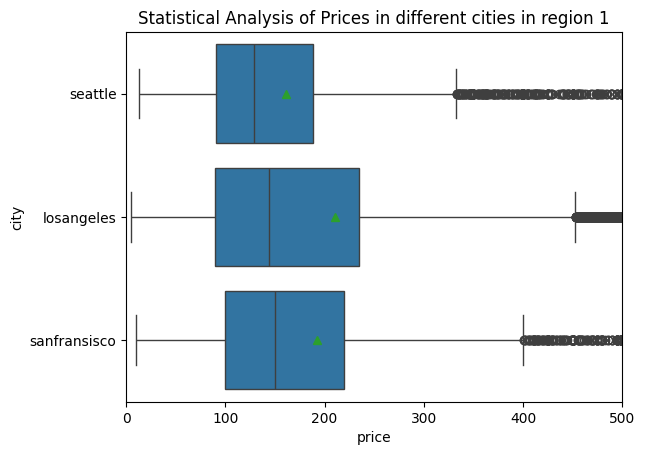

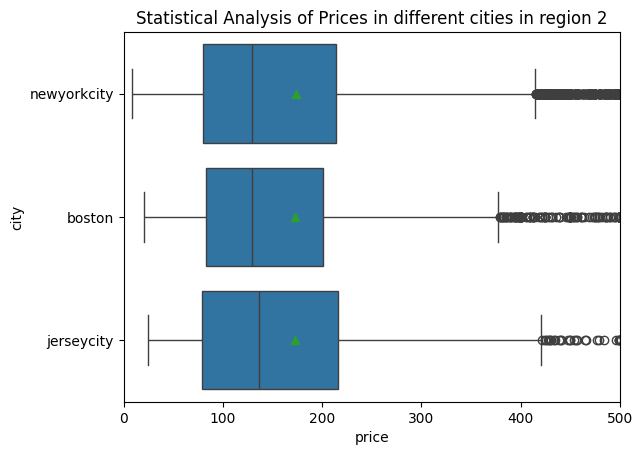

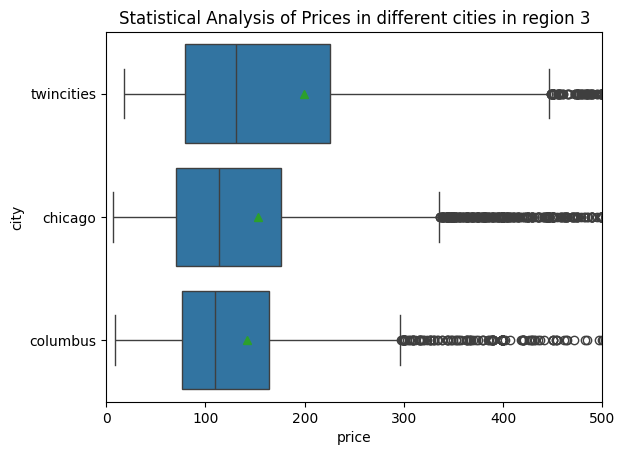

In [2]:
city_counts = region_1_data_frames['city'].value_counts()
city_counts=region_1_data_frames[region_1_data_frames['city'].isin(city_counts.index)]
sns.boxplot(x='price', y='city', showmeans=True, data=city_counts)
plt.title("Statistical Analysis of Prices in different cities in region 1")
plt.xlim(0,500)
plt.show()

city_counts = region_2_data_frames['city'].value_counts()
city_counts=region_2_data_frames[region_2_data_frames['city'].isin(city_counts.index)]
sns.boxplot(x='price', y='city', showmeans=True, data=city_counts)
plt.title("Statistical Analysis of Prices in different cities in region 2")
plt.xlim(0,500)
plt.show()

city_counts = region_3_data_frames['city'].value_counts()
city_counts=region_3_data_frames[region_3_data_frames['city'].isin(city_counts.index)]
sns.boxplot(x='price', y='city', showmeans=True, data=city_counts)
plt.title("Statistical Analysis of Prices in different cities in region 3")
plt.xlim(0,500)
plt.show()

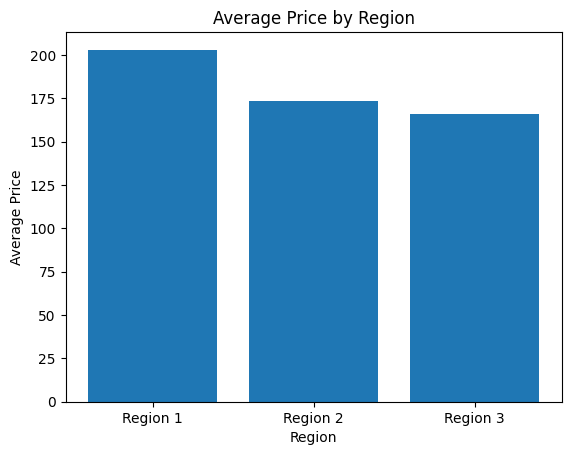

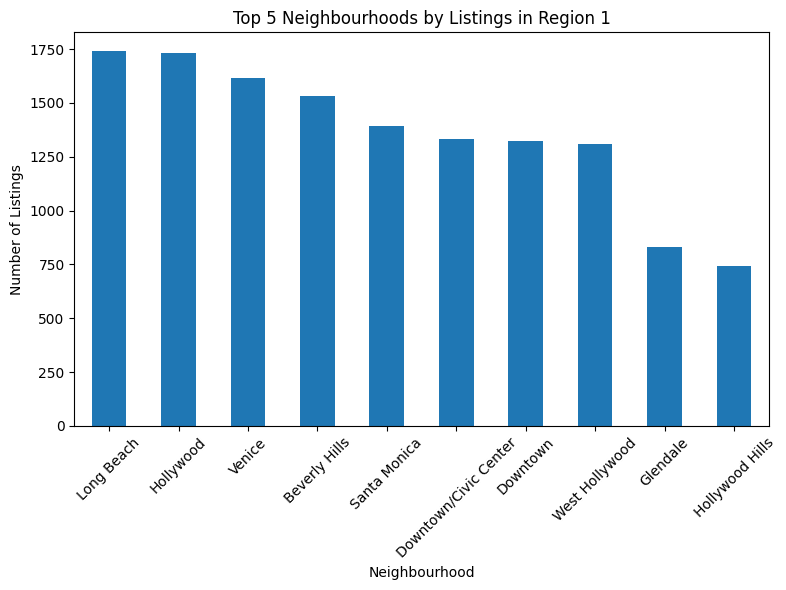

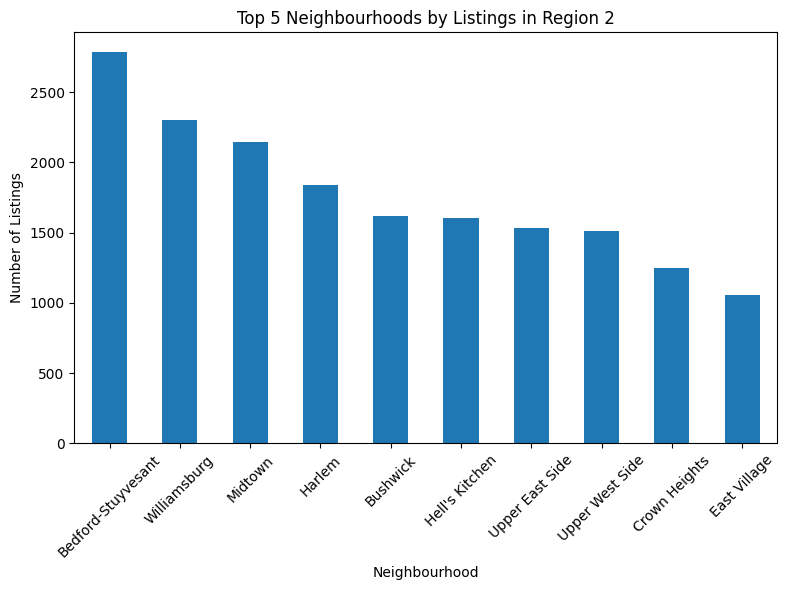

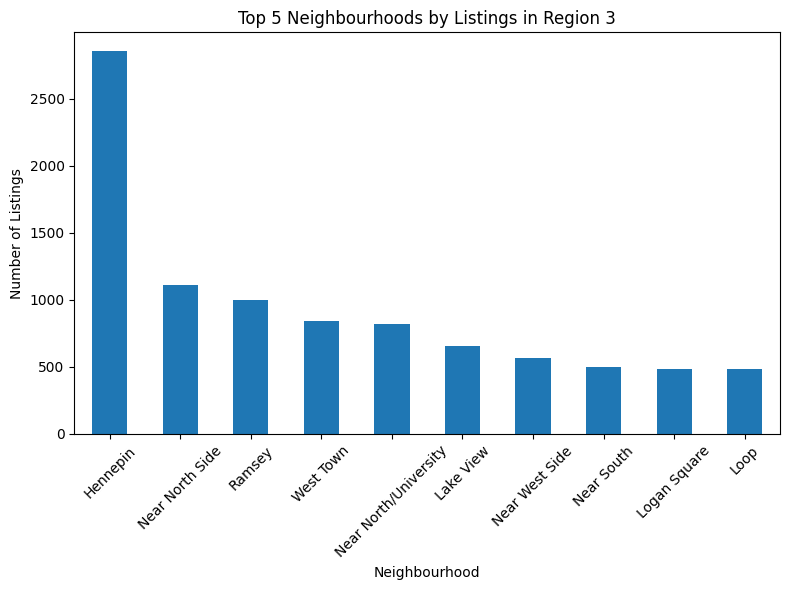

In [3]:
mean_price_region_1 = region_1_data_frames['price'].mean()
mean_price_region_2 = region_2_data_frames['price'].mean()
mean_price_region_3 = region_3_data_frames['price'].mean()

mean_prices = pd.DataFrame({
    'Region': ['Region 1', 'Region 2', 'Region 3'],
    'Average Price': [mean_price_region_1, mean_price_region_2, mean_price_region_3]
})

plt.bar(mean_prices['Region'], mean_prices['Average Price'])
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price by Region')
plt.show()


top_neighbourhoods_region_1 = region_1_data_frames['neighbourhood'].value_counts().head(10)
top_neighbourhoods_region_2 = region_2_data_frames['neighbourhood'].value_counts().head(10)
top_neighbourhoods_region_3 = region_3_data_frames['neighbourhood'].value_counts().head(10)

plt.figure(figsize=(8, 6))
top_neighbourhoods_region_1.plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.title('Top 5 Neighbourhoods by Listings in Region 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
top_neighbourhoods_region_2.plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.title('Top 5 Neighbourhoods by Listings in Region 2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
top_neighbourhoods_region_3.plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.title('Top 5 Neighbourhoods by Listings in Region 3')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

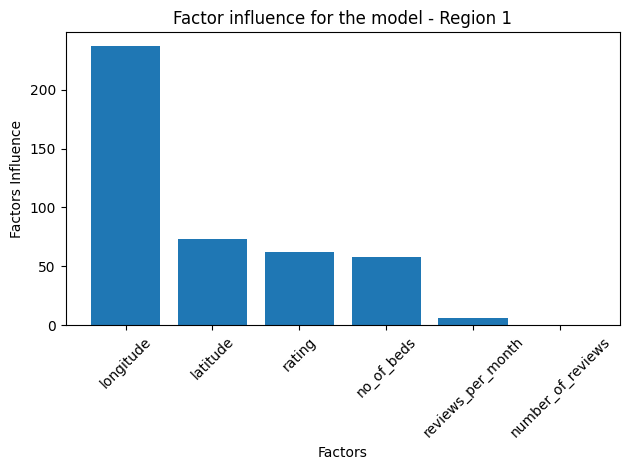

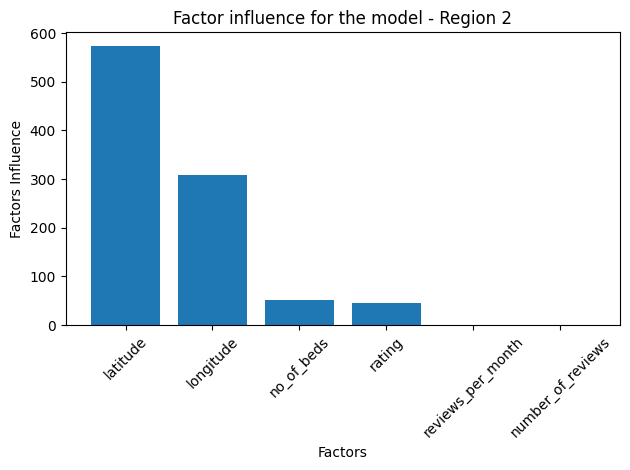

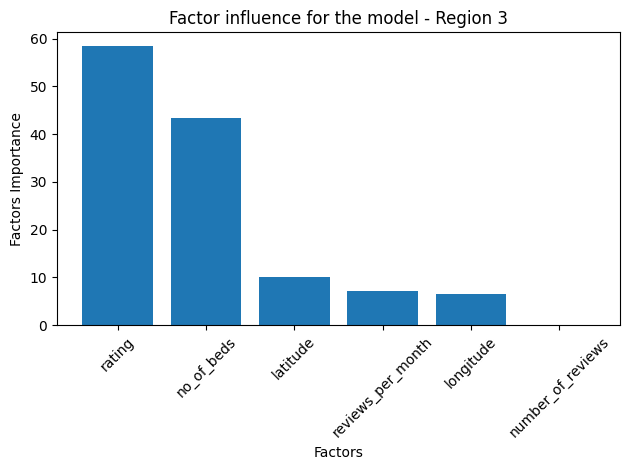

In [4]:
factors = ['rating', 'latitude', 'longitude', 'reviews_per_month', 'number_of_reviews','no_of_beds']
result = 'price'


df1 = region_1_data_frames.dropna(subset=factors + [result])
model1 = LinearRegression()
model1.fit(df1[factors], df1[result])
coeff = np.abs(model1.coef_)
sorted_idx1 = coeff.argsort()[::-1]
sorted_influence1 = coeff[sorted_idx1]
sorted_features1 = np.array(factors)[sorted_idx1]
plt.bar(sorted_features1, sorted_influence1)
plt.xlabel('Factors')
plt.ylabel('Factors Influence')
plt.title('Factor influence for the model - Region 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df2 = region_2_data_frames.dropna(subset=factors + [result])
model2 = LinearRegression()
model2.fit(df2[factors], df2[result])
coeff = np.abs(model2.coef_)
sorted_idx2 = coeff.argsort()[::-1]
sorted_influence2 = coeff[sorted_idx2]
sorted_features2 = np.array(factors)[sorted_idx2]
plt.bar(sorted_features2, sorted_influence2)
plt.xlabel('Factors')
plt.ylabel('Factors Influence')
plt.title('Factor influence for the model - Region 2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df3 = region_3_data_frames.dropna(subset=factors + [result])
model3 = LinearRegression()
model3.fit(df3[factors], df3[result])
importance3 = np.abs(model3.coef_)
sorted_idx3 = importance3.argsort()[::-1]
sorted_influence3 = importance3[sorted_idx3]
sorted_features3 = np.array(factors)[sorted_idx3]
plt.bar(sorted_features3, sorted_influence3)
plt.xlabel('Factors')
plt.ylabel('Factors Importance')
plt.title('Factor influence for the model - Region 3')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Model Accuracy for Region 1: 
93.00692048137142


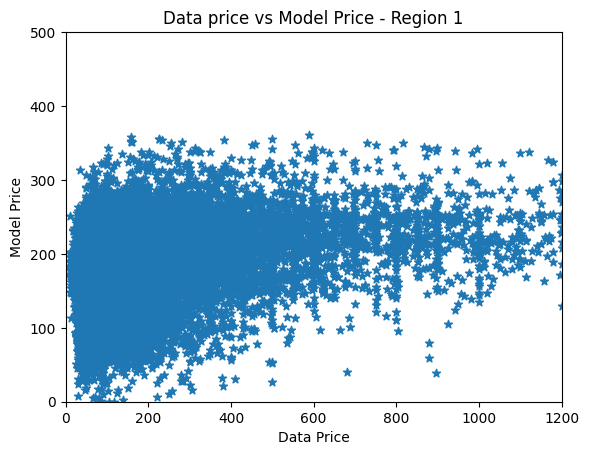

Model Accuracy for Region 2: 
97.35493130846565


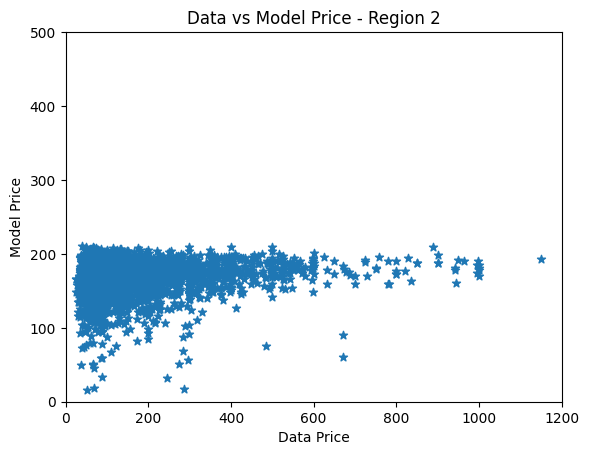

Model Accuracy for Region 3: 
97.01260702999133


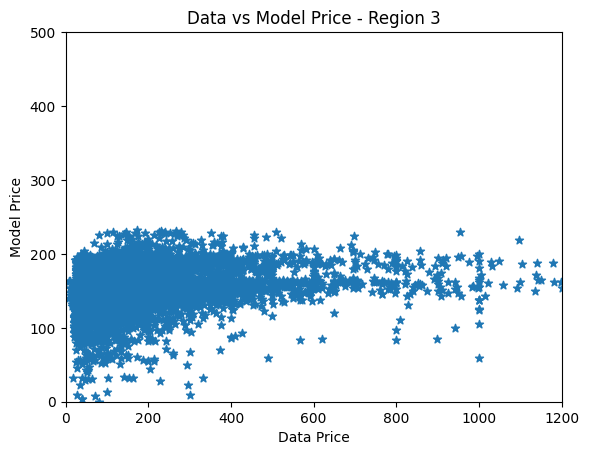

In [5]:
chosen_factors=['rating', 'latitude', 'longitude']
model1 = LinearRegression()
model1.fit(df1[chosen_factors], df1[result])
model_predictions1 = model1.predict(df1[['rating', 'latitude', 'longitude']])
r2_1 = r2_score(df1[result], model_predictions1)
print("Model Accuracy for Region 1: ")
print((1-r2_1)*100)
plt.scatter(df1[result], model_predictions1, marker="*")
plt.xlim(0,1200)
plt.ylim(0,500)
plt.xlabel('Data Price')
plt.ylabel('Model Price')
plt.title('Data price vs Model Price - Region 1')
plt.show()

model2 = LinearRegression()
model2.fit(df2[chosen_factors], df2[result])
model_predictions2 = model2.predict(df2[['rating', 'latitude', 'longitude']])
r2_2 = r2_score(df2[result], model_predictions2)
print("Model Accuracy for Region 2: ")
print((1-r2_2)*100)
plt.scatter(df2[result], model_predictions2, marker="*")
plt.xlim(0,1200)
plt.ylim(0,500)
plt.xlabel('Data Price')
plt.ylabel('Model Price')
plt.title('Data vs Model Price - Region 2')
plt.show()

model3 = LinearRegression()
model3.fit(df3[chosen_factors], df3[result])
model_predictions3 = model3.predict(df3[['rating', 'latitude', 'longitude']])
r2_3 = r2_score(df3[result], model_predictions3)
print("Model Accuracy for Region 3: ")
print((1-r2_3)*100)
plt.scatter(df3[result], model_predictions3, marker="*")
plt.xlim(0,1200)
plt.ylim(0,500)
plt.xlabel('Data Price')
plt.ylabel('Model Price')
plt.title('Data vs Model Price - Region 3')
plt.show()